#Import Library

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


#Prelimanary Flow

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
#Load data

boston=pd.read_csv('/content/drive/MyDrive/Dibimbing/data/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [87]:
#Check of the data type
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [119]:
#Statistical info
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


###Data Cleaning


In [88]:
# Detect missing value
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [89]:
#Detect duplicate value
boston.duplicated().sum()

0

Good!! No duplicate and missing value. The data is ready to be used

##Exploratory Data Analysis

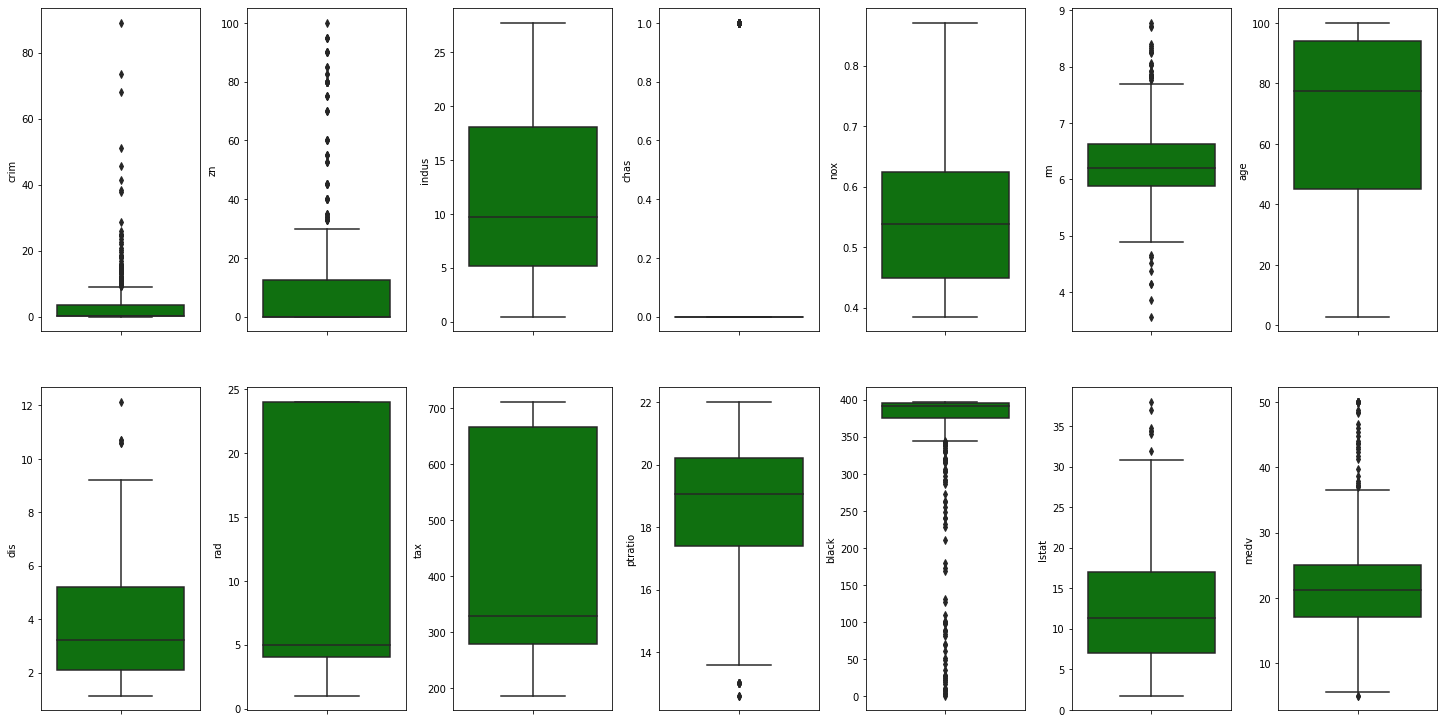

In [90]:
#create boxplot
fig, ax = plt.subplots(ncols=7, nrows= 2, figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in boston.items():
    sns.boxplot(y=col, data=boston, color='green', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

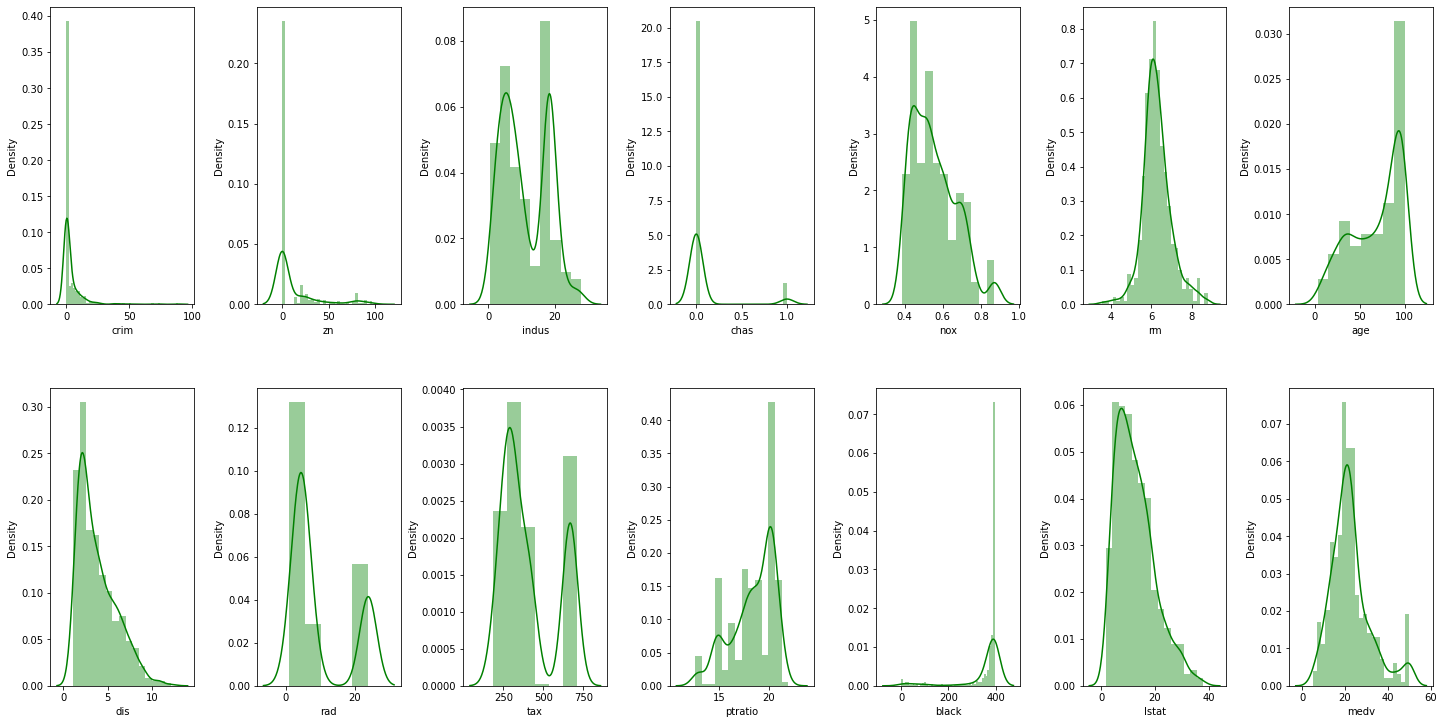

In [91]:
# Create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in boston.items():
    sns.distplot(value, color='green', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Min-Max Normalization


In [92]:
cols = ['crim','zn','tax','black']
for col in cols:
  ##Find minimum and maximum of that column
  minimum = min(boston[col])
  maximum = max(boston[col])
  boston[col] = (boston[col]-minimum)/(maximum-minimum)

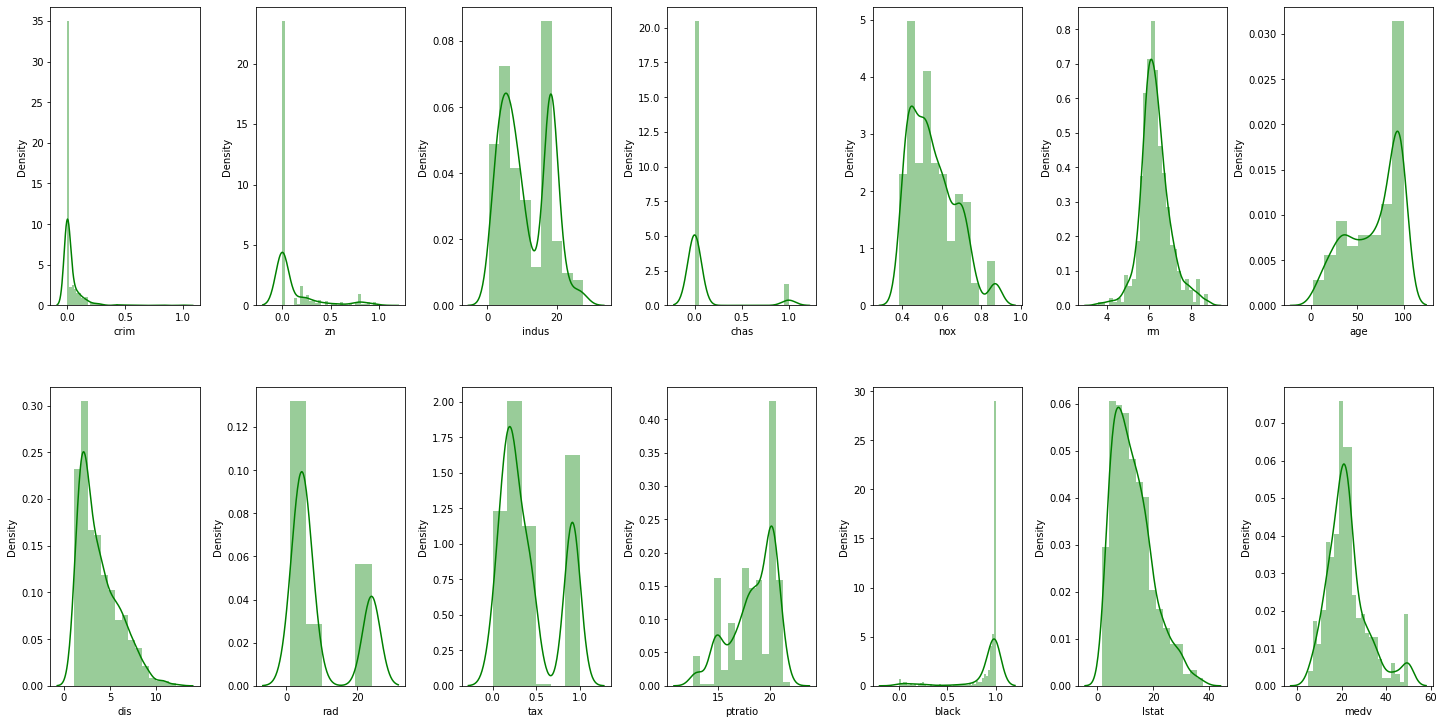

In [93]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax=ax.flatten()

for col, value in boston.items():
    sns.distplot(value, color='green', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [94]:
# standarization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

#fit our data
scaled_cols = scalar.fit_transform(boston[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns = cols)
scaled_cols.head()

,crim,zn,tax,black
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [95]:
for col in cols:
    boston[col] = scaled_cols[col]

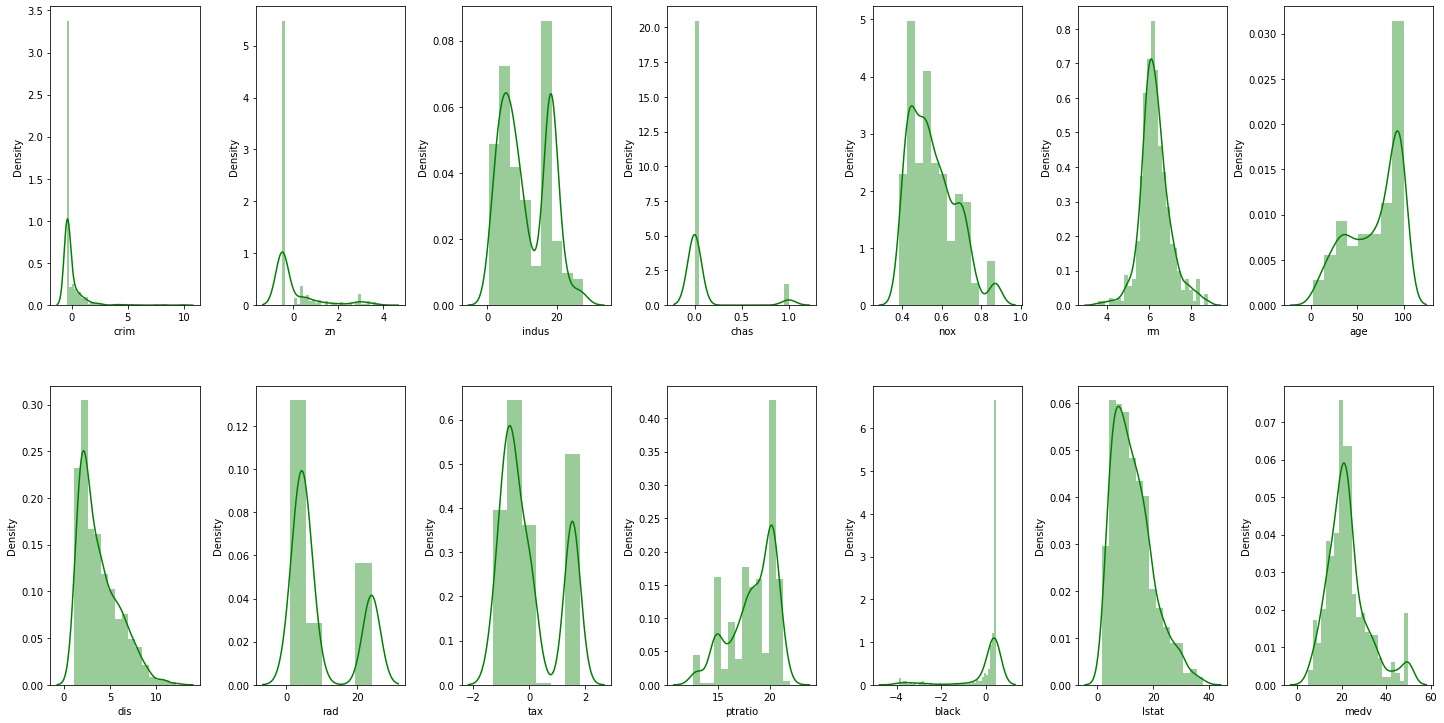

In [96]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))

index = 0
ax = ax.flatten()

for col, value in boston.items():
    sns.distplot(value, color='green', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

##Split the data

- Split the data into: train, validate, & test

In [97]:
#Split train test

from sklearn.model_selection import train_test_split

feature=boston.drop(columns='medv')
target=boston[['medv']]

feature_boston_train, feature_boston_test, target_boston_train, target_boston_test=train_test_split(feature,target,test_size=0.20,random_state=42)

##Correlation Matrix

In [98]:
#Calculate VIF scores  #optional

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X= add_constant(feature_boston_train)

vif_df=pd.DataFrame([vif(X.values,i)
                for i in range (X.shape[1])],
                index=X.columns).reset_index()
vif_df.columns=['feature','vif_score']
vif_df=vif_df.loc[vif_df.feature!='constant']
vif_df

,feature,vif_score
0,const,545.744789
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316


There is feature with high VIF score:
1. `tax`


<function matplotlib.pyplot.show>

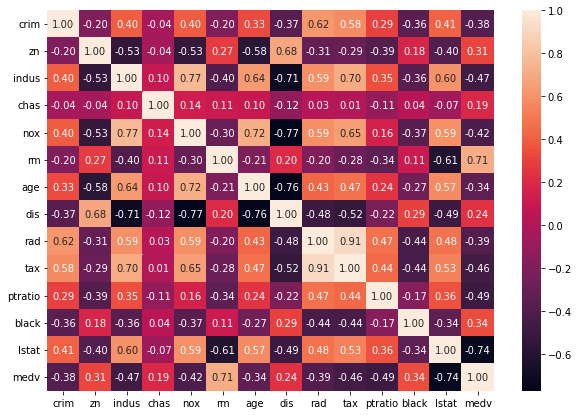

In [99]:
#heatmap correlation
boston_train=pd.concat([feature_boston_train,target_boston_train],axis=1)
corr=boston_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,fmt='.2f')
plt.show

Rows that have more than 0.8 of VIF scores should be retained 1 row and drop others.

We can retain rad and drop tax.

In [100]:
#drop redundant feature
feature_boston_train=feature_boston_train.drop(columns=['tax'])
feature_boston_test=feature_boston_test.drop(columns=['tax'])

In [101]:
#Recheck VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
X=add_constant(feature_boston_train)

vif_df=pd.DataFrame([vif(X.values,i)
              for i in range(X.shape[1])],
              index=X.columns).reset_index()

vif_df.columns=['feature','vif_score']
vif_df=vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.713011
2,zn,2.272069
3,indus,3.283700
4,chas,1.084778
5,nox,4.426033
6,rm,1.934680
7,age,2.989897
8,dis,4.160822
9,rad,2.852653
10,ptratio,1.839747


Good! Multicol issue already solved.

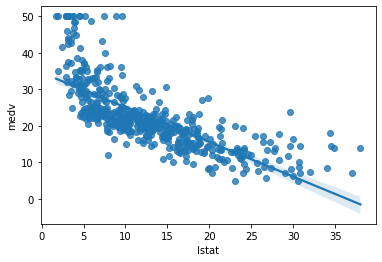

In [102]:
#Regression plot
sns.regplot(y=boston['medv'], x=boston['lstat'])

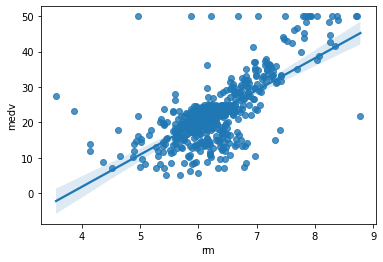

In [103]:
sns.regplot(y=boston['medv'], x=boston['rm'])

#Training Data

In [104]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model,feature,target):
    #train the model
    feature_train, feature_test, target_train, target_test = train_test_split(feature, target, random_state=42)
    model.fit(feature_train, target_train)

    #predict the training set
    pred = model.predict(feature_test)

    #perform cross validation
    cv_score = cross_val_score (model, feature, target, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print('Model Report')
    print('MSE:' , mean_squared_error(target_test, pred))
    print('CV Score:' , cv_score)

[09:58:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Report
MSE: 10.118980341514229
CV Score: 18.088823612430293


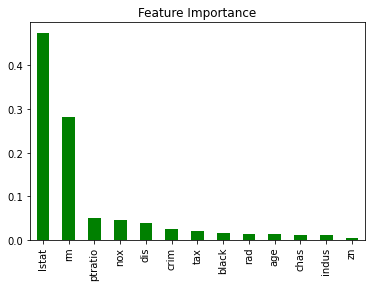

In [105]:
#Training data for XGBoost Model
import xgboost as xgb
model = xgb.XGBRegressor()
train(model,feature,target)
coef = pd.Series(model.feature_importances_, feature.columns).sort_values(ascending=False)
coef.plot(kind='bar', color='green', title='Feature Importance')

#### What features are most impact on house price in Boston?

Based on the graphic above, the most important features that effect on the house price in Boston are Lstat (% lower status of the population) which has more than 45% portion and rm (average number of rooms per dwelling) which has almost 30% portion.

In [106]:
#Splitting to training and testing data

from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split (feature, target, test_size=0.20, random_state = 4)

###XGBoost Regressor

####Training the model

In [107]:
#Improt XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

#Train the model using the training sets
reg.fit(feature_train, target_train)

[09:58:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

####Model Evaluation

In [108]:
#Model prediction on train data
target_pred=reg.predict(feature_train)

In [109]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics

In [110]:
print('R^2:',metrics.r2_score(target_train, target_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(target_train, target_pred))*(len(target_train)-1)/(len(target_train)-feature_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(target_train, target_pred))
print('MSE:',metrics.mean_absolute_percentage_error(target_train, target_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(target_train, target_pred)))

R^2: 0.9717342082494869
Adjusted R^2: 0.9707920151911364
MAE: 1.1675756293948336
MSE: 0.06179553134773935
RMSE: 1.5225075437802649


In [111]:
# Model Evaluation
print('R^2:',metrics.r2_score(target_train, target_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(target_train, target_pred))*(len(target_train)-1)/(len(target_train)-feature_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(target_train, target_pred))
print('MAPE:',metrics.mean_absolute_percentage_error(target_train, target_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(target_train, target_pred)))

R^2: 0.9717342082494869
Adjusted R^2: 0.9707920151911364
MAE: 1.1675756293948336
MAPE: 0.06179553134773935
RMSE: 1.5225075437802649


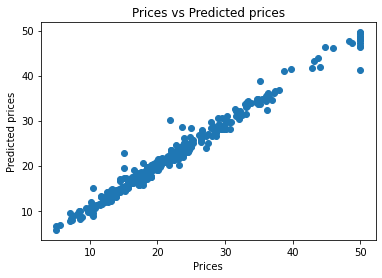

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(target_train, target_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [112]:
# Checking residuals
plt.scatter(target_pred,target_train-target_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

ValueError: ignored

In [113]:
##Fixing the error above
target_pred=target_pred.reshape(404,1)

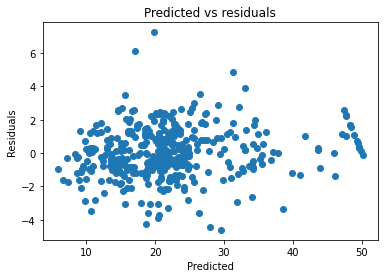

In [114]:
# Retry for checking residuals
plt.scatter(target_pred,target_train-target_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [115]:
#Predicting Test data with the model
target_test_pred = reg.predict(feature_test)

In [116]:
# Model Evaluation
acc_xgb = metrics.r2_score(target_test, target_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(target_test, target_test_pred))*(len(target_test)-1)/(len(target_test)-feature_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(target_test, target_test_pred))
print('MAPE:',metrics.mean_absolute_percentage_error(target_test, target_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(target_test, target_test_pred)))

R^2: 0.8274705051575798
Adjusted R^2: 0.801983193419495
MAE: 2.3156372229258215
MAPE: 0.10365569853758658
RMSE: 4.003265036333621


####Model evaluation

MAPE = 0.10365569853758658 = 10.37%

Based on the MAPE, the model is acceptable.

R^2 = 0.8274705051575798 = 82.75%

Based on the R^2, features explains the model 82.75%, while the rest is explained by others features outside the model.